In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

In [2]:
with open("traces-sc128-10000-6100.bin", "rb") as f:
    N, = struct.unpack('<I', f.read(4))
    print(f"N: {N}")
    L, = struct.unpack('<I', f.read(4))
    print(f"L: {L}")
    traces = []
    for n in range(N):
        traces.append(np.array(struct.unpack('<' + 'd' * L, f.read(L * 8)), dtype=np.float64))
    traces = np.array(traces)
del f

N: 10000
L: 6100


i=1: (1500, 3000)

i=1, j=1: (1780, 1960)

i=1, SR: (2320, 2450)

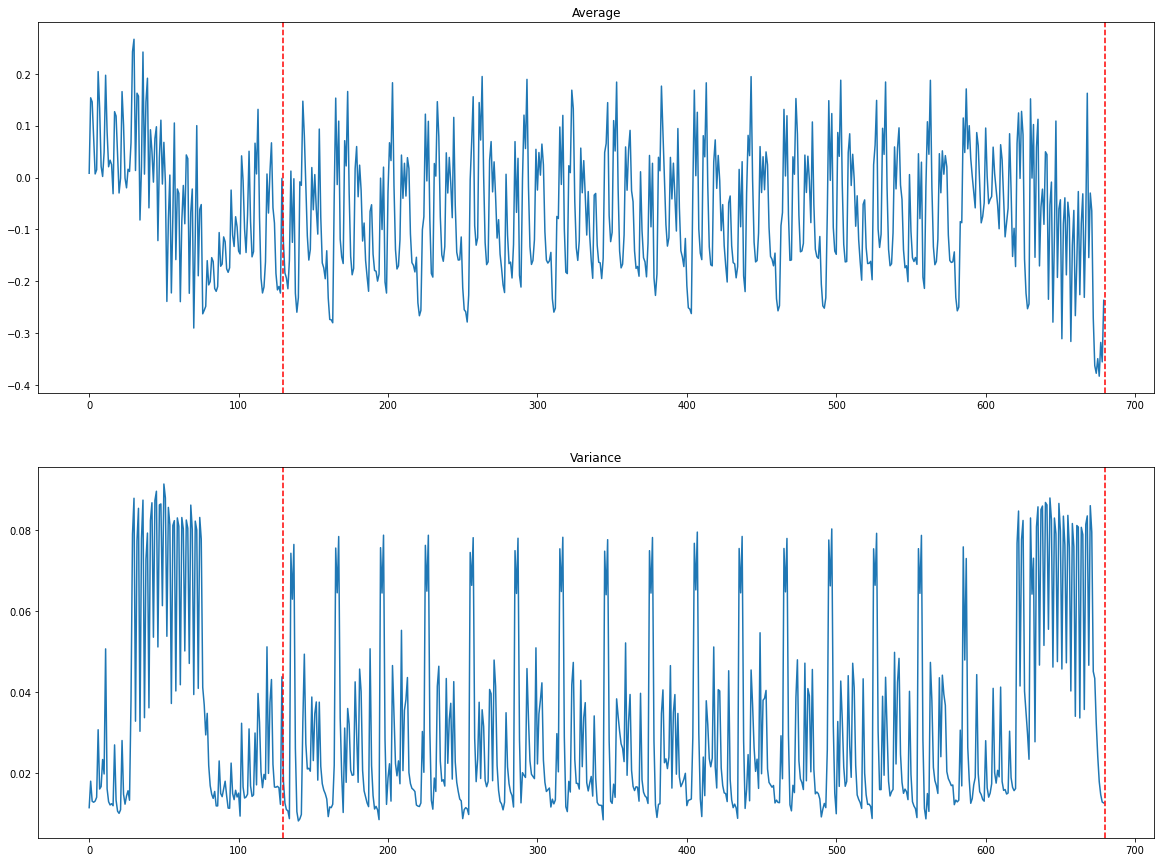

In [4]:
roiL, roiR = 2320, 3000
segL, segR = 2450, 3000
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR], '-')
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

80


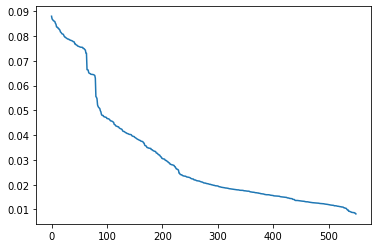

[513 510 519 511 540 508 505 507 492 525 538 522 500 516 514 495 528 537
 531 504 532 534 367 520 277 541 397 517 535  67  97 427 307  37 187 247
 127 157 337 494 217 365 491 275   7 523  95 529 455 526  65  35 335 305
 425 395 185 155 245 215 125   5 502 457 396 126 366 276  96 186 336  36
 306  66 246 426 156 501 216   6 512  79 319 229 509 288 169  58 409  14
 412 344 456 141 518 433 194 524 349 381 506 539  73 259 104 515 163 521
  51 354 313 298 542 464 441 378 403  83 439 543 109 388 199 373 114  48
 411 173 193 493 142 103 480 382 475 351 138 291 254 323 292 527 496 419
  52 239 139 442 232 262 352 401  19 343 322 223  82 172 321 283 434  22
  24 131 202 112 314 443  43 536 133  81 261 149 497 264 253  21  74 171
 208 224 530 201 533  38 164 374 111 371  13 231 544  44 284 368 134 404
  41 453  98 398 486 225  93 278 183 498  49 338 333 188 274 128  68 158
 428 470 218 308 248 503  15 226 379 458 315 227   8 364 413 311 545 440
 281 258 287 285 256 130 317 499 195 174  20 345  7

In [6]:
sig = traces[:, segL:segR]
var = np.std(sig, ddof=1, axis=0)
max_idx = len(var[var > 0.06])
print(max_idx)
var_index = np.argsort(var)[::-1]
plt.plot(var[var_index])
plt.show()
print(var_index)

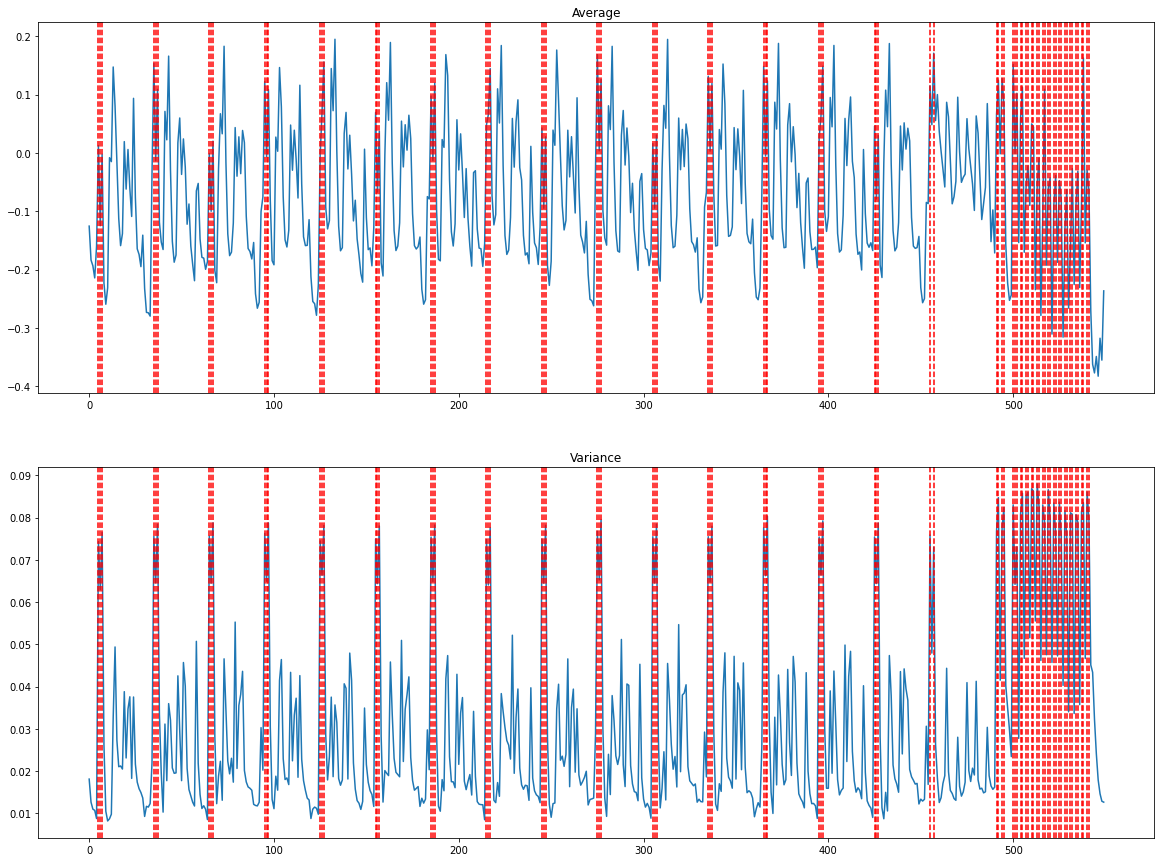

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[segL:segR])
for i in var_index[:max_idx]:
    plt.axvline(i, color='r', linestyle='--')
# plt.axvline(segL - roiL, color='r', linestyle='--')
# plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [8]:
np.array(sorted(var_index[:max_idx]))

array([  5,   6,   7,  35,  36,  37,  65,  66,  67,  95,  96,  97, 125,
       126, 127, 155, 156, 157, 185, 186, 187, 215, 216, 217, 245, 246,
       247, 275, 276, 277, 305, 306, 307, 335, 336, 337, 365, 366, 367,
       395, 396, 397, 425, 426, 427, 455, 457, 491, 492, 494, 495, 500,
       501, 502, 504, 505, 507, 508, 510, 511, 513, 514, 516, 517, 519,
       520, 522, 523, 525, 526, 528, 529, 531, 532, 534, 535, 537, 538,
       540, 541])

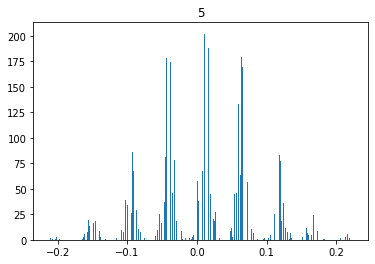

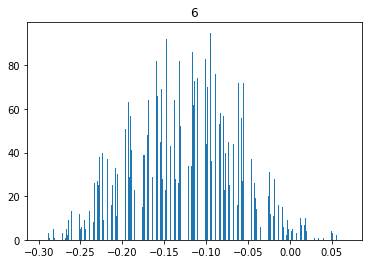

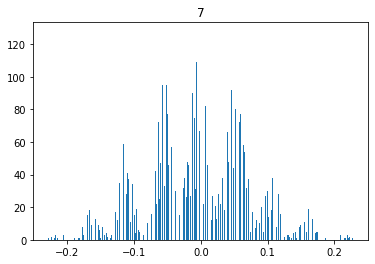

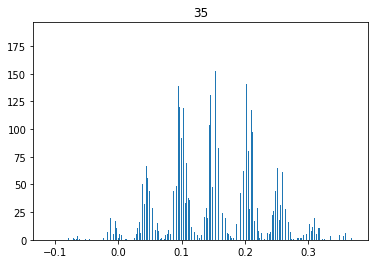

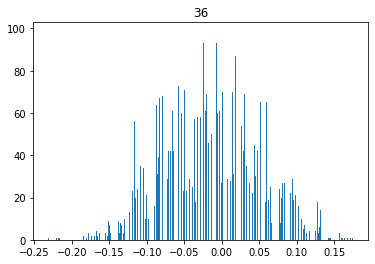

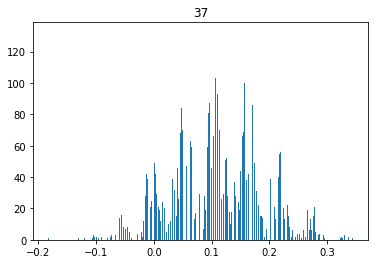

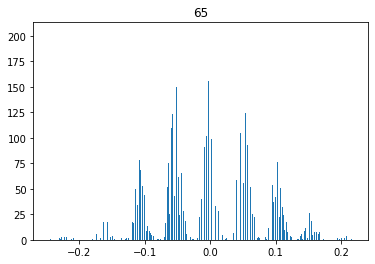

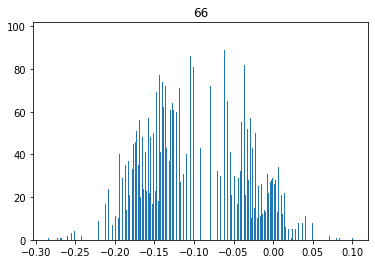

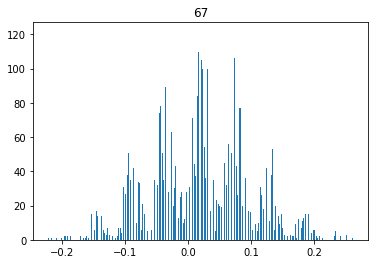

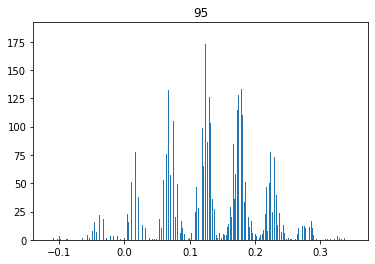

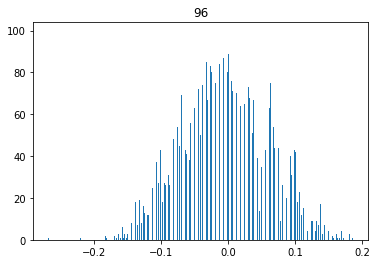

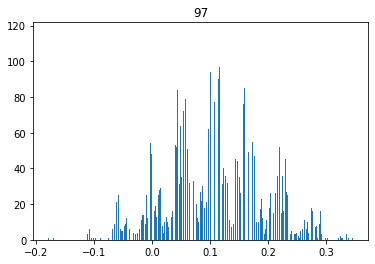

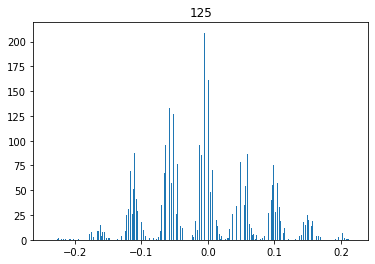

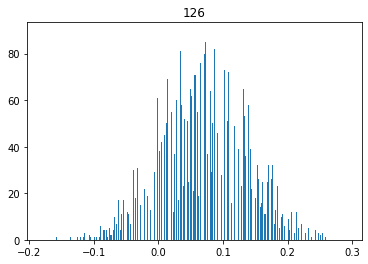

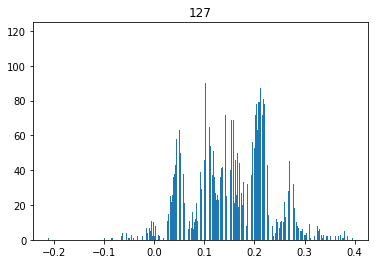

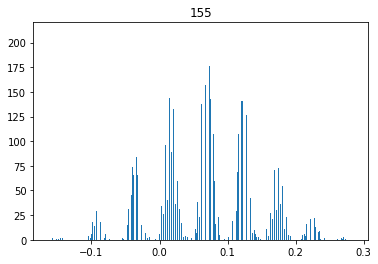

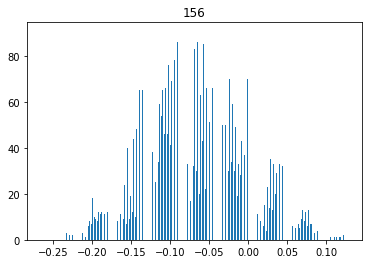

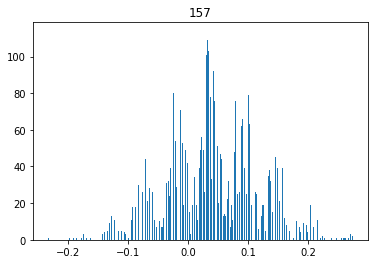

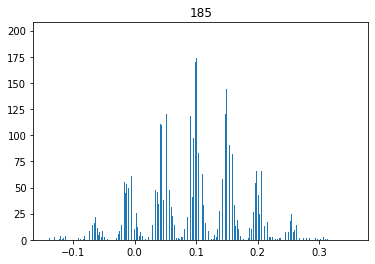

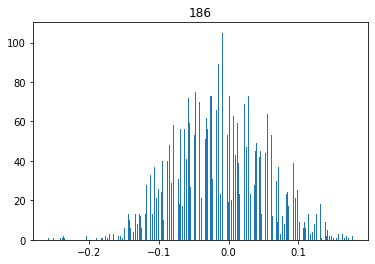

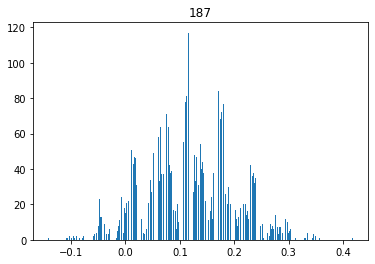

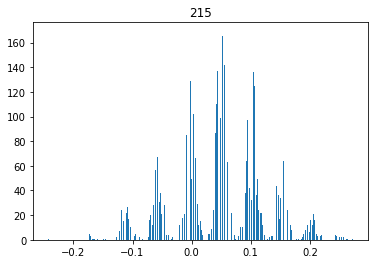

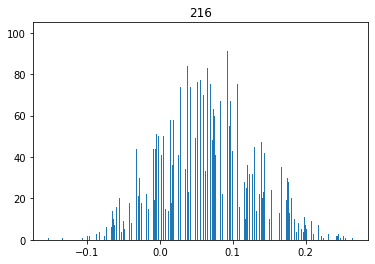

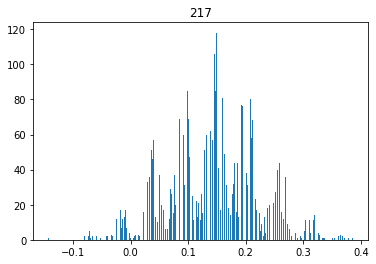

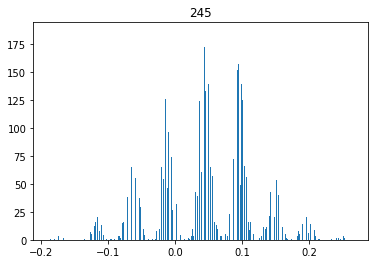

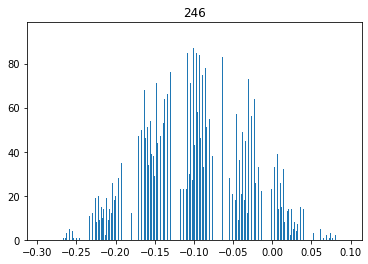

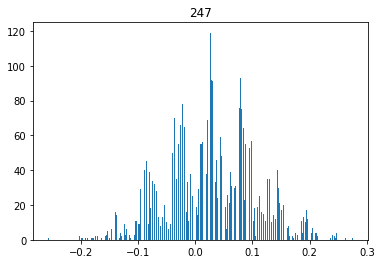

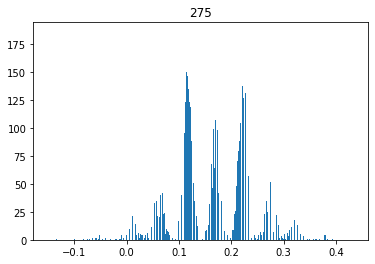

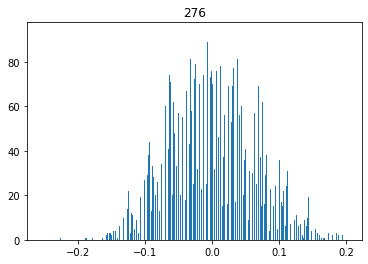

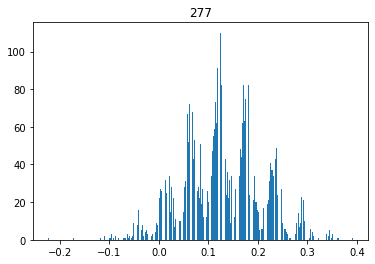

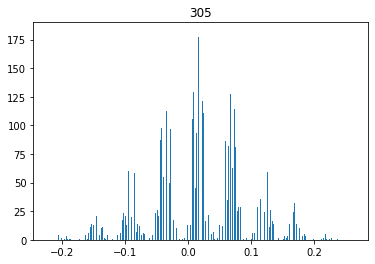

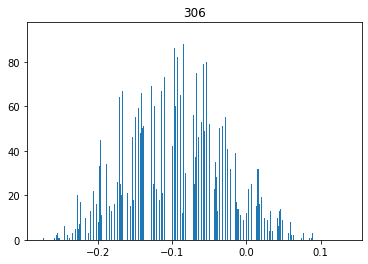

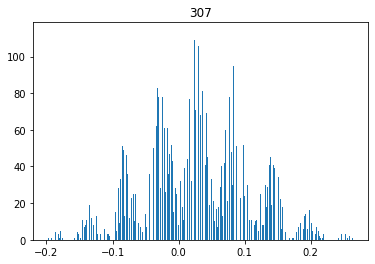

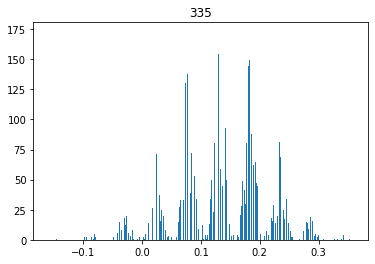

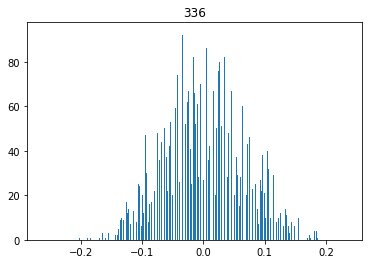

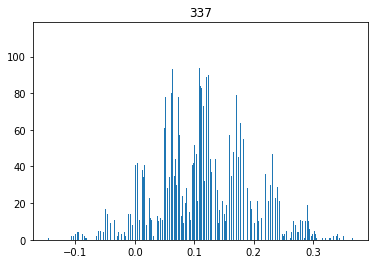

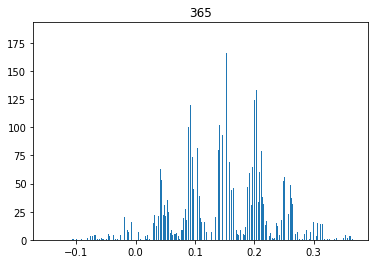

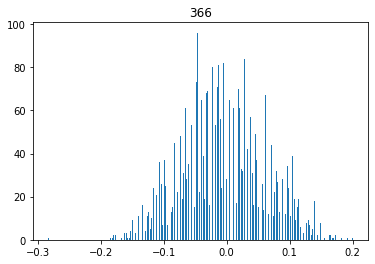

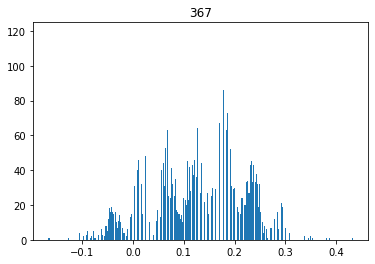

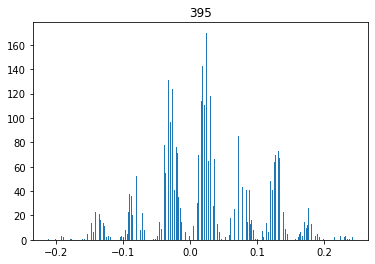

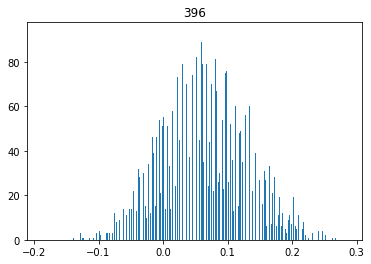

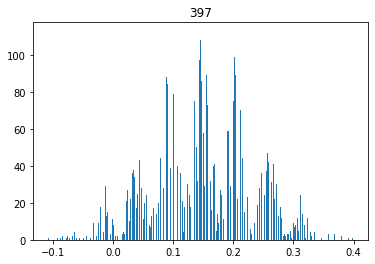

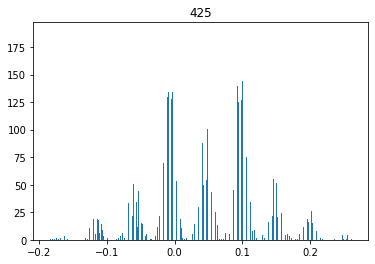

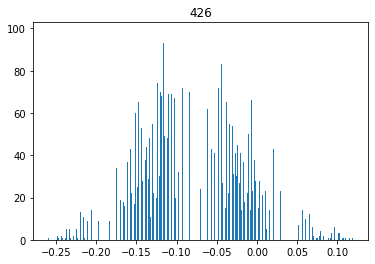

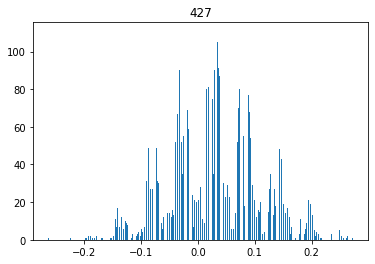

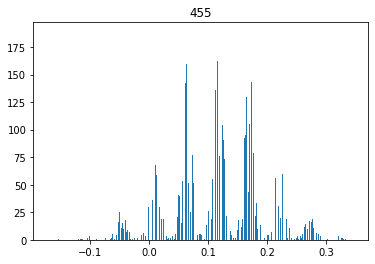

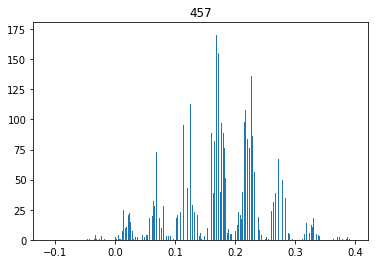

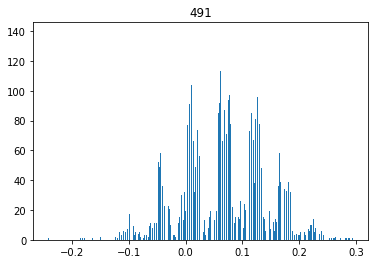

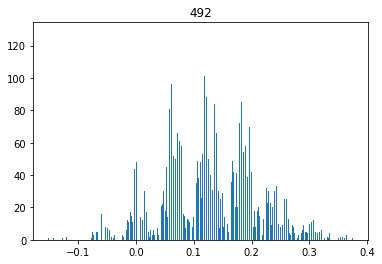

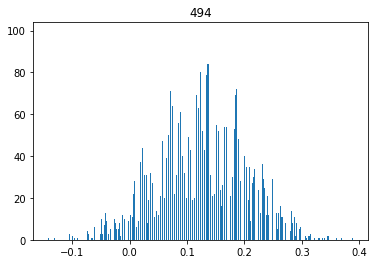

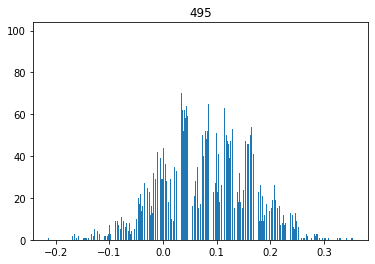

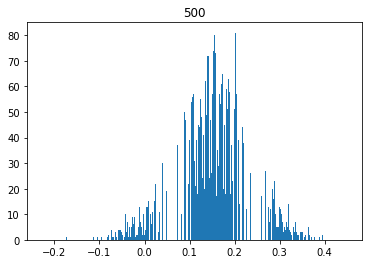

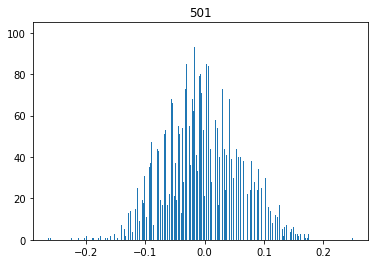

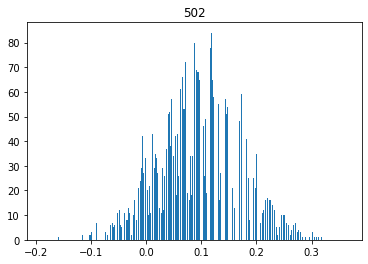

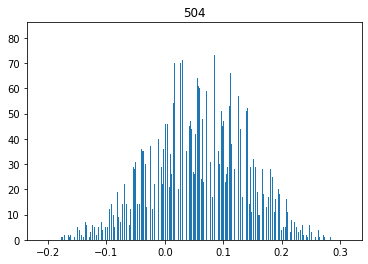

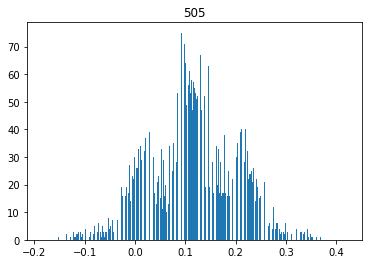

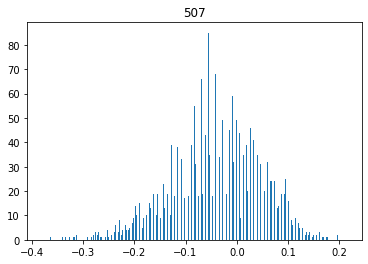

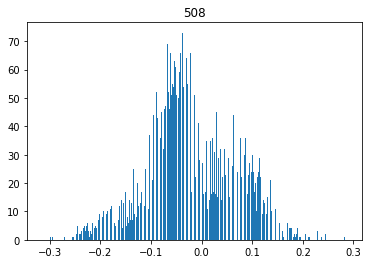

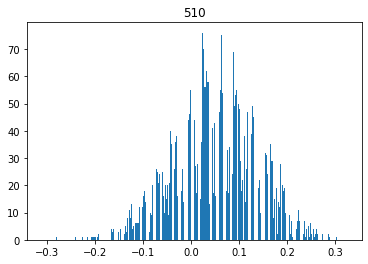

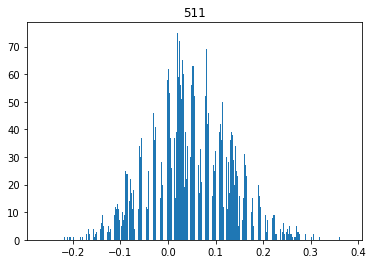

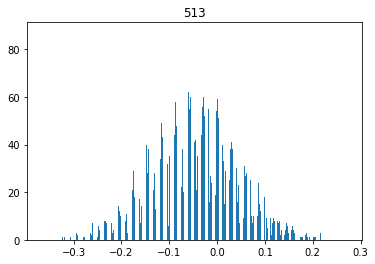

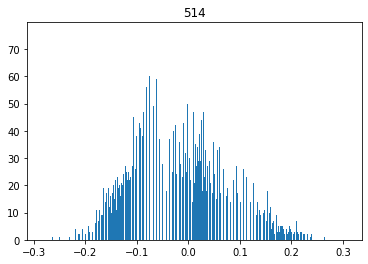

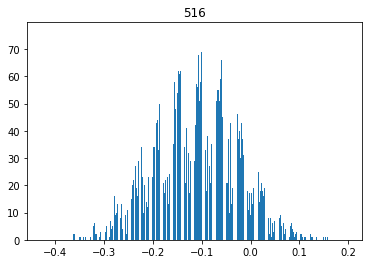

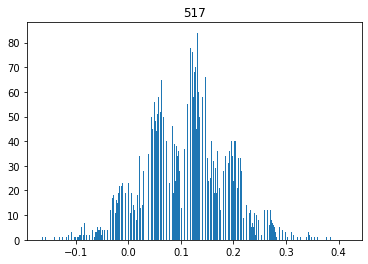

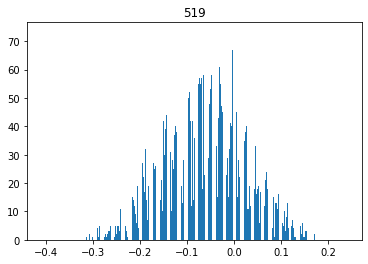

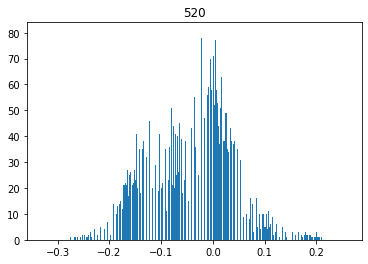

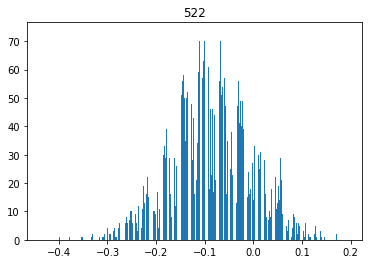

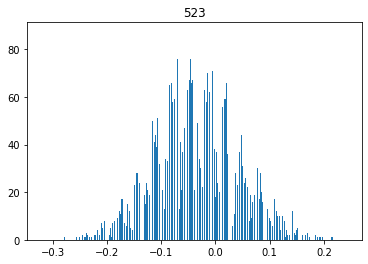

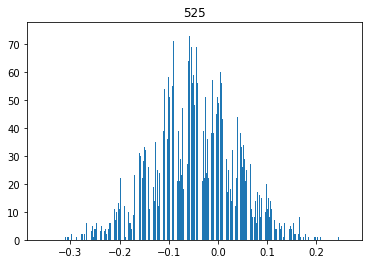

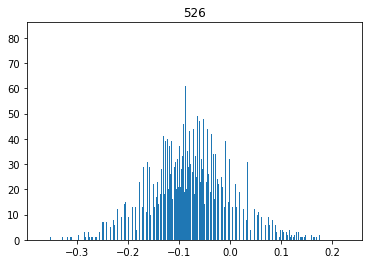

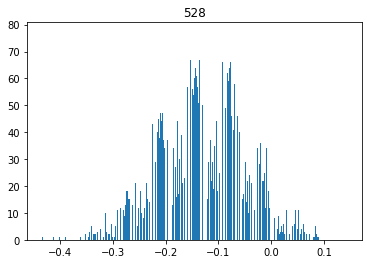

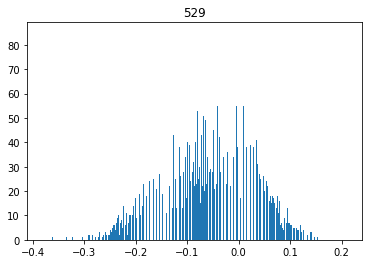

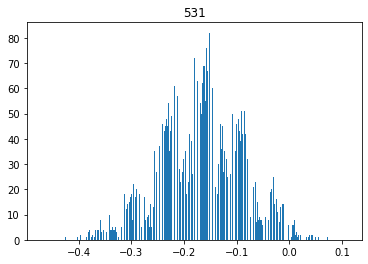

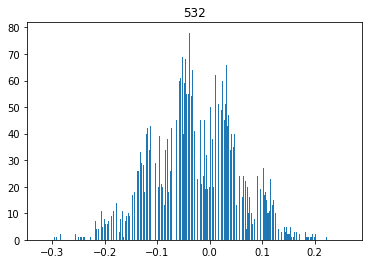

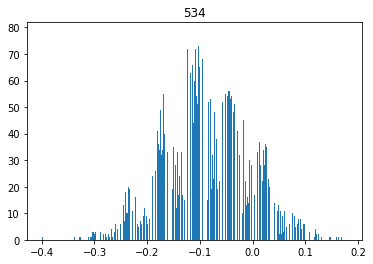

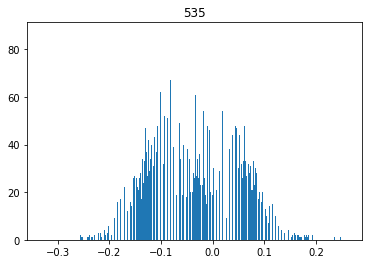

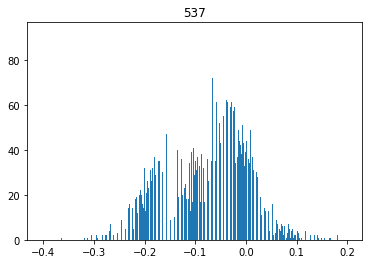

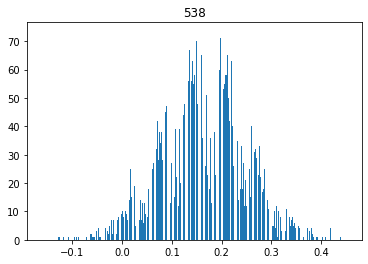

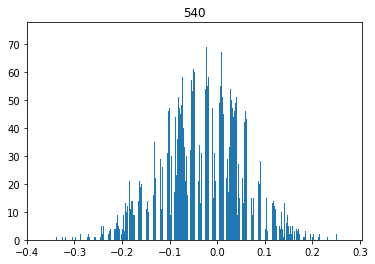

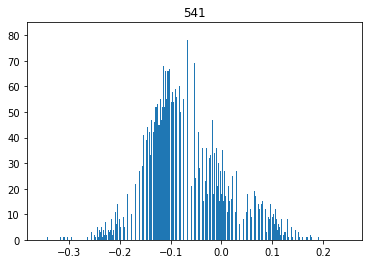

In [9]:
# plt.figure(figsize=(30,10 * max_idx))
for i, idx in enumerate(sorted(var_index[:max_idx])):
    # plt.subplot(max_idx, 1, i+1)
    plt.hist(sig[:,idx], bins=1000)
    plt.title(idx)
    plt.show()

# XOR Analysis

In [10]:
print(var_index[:max_idx])

[513 510 519 511 540 508 505 507 492 525 538 522 500 516 514 495 528 537
 531 504 532 534 367 520 277 541 397 517 535  67  97 427 307  37 187 247
 127 157 337 494 217 365 491 275   7 523  95 529 455 526  65  35 335 305
 425 395 185 155 245 215 125   5 502 457 396 126 366 276  96 186 336  36
 306  66 246 426 156 501 216   6]


In [32]:
indices = sorted(var_index[:max_idx])
# indices = list(map(lambda c: c[1], filter(lambda c: indices[c[0]+1] - c[1] > 3, enumerate(indices[:-1])))) + indices[-1:]
# indices = indices[:1] + list(map(lambda c: c[1], filter(lambda c: indices[c[0]-1] - c[1] < -3, enumerate(indices[1:]))))

sig = traces[:, segL: segR][:, indices]

(0.0, 80.0, 80.0, 0.0)

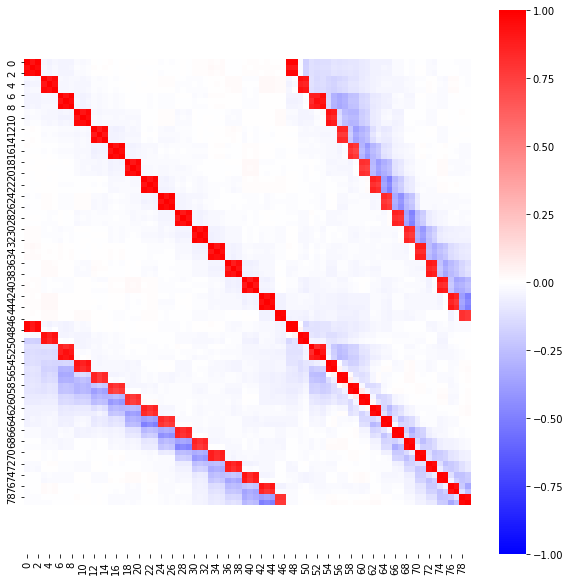

In [33]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T), vmin=-1, vmax=1, cmap='bwr')
plt.axis('equal')

<AxesSubplot:>

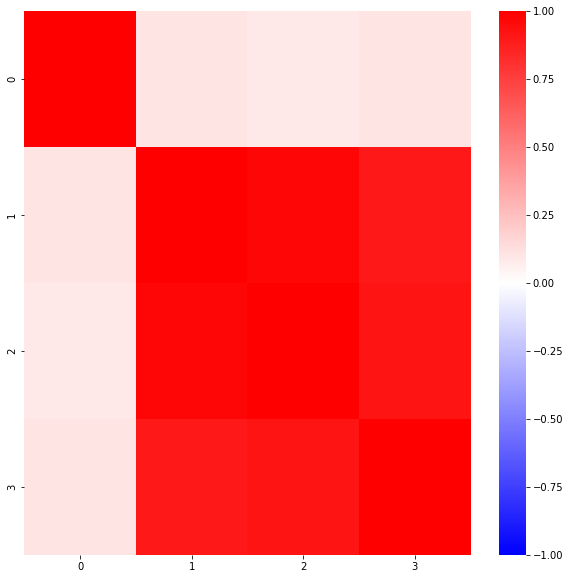

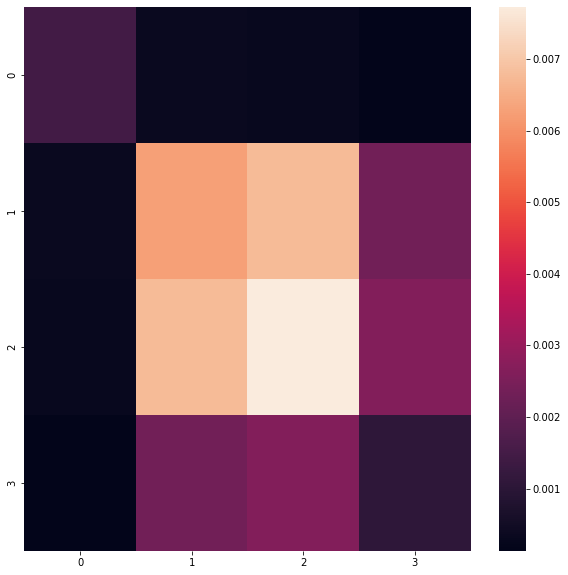

In [37]:
import seaborn as sns
heatmap_roi = slice(28, 32)
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T[heatmap_roi]), vmin=-1, vmax=1, cmap='bwr')
plt.figure(figsize=(10, 10))
sns.heatmap((np.abs(np.cov(sig.T[heatmap_roi]))), )

<AxesSubplot:>

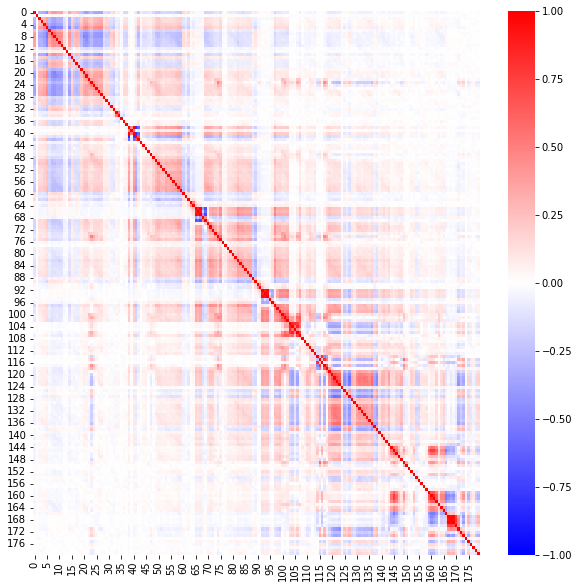

In [45]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(sig.T**2), vmin=-1, vmax=1, cmap='bwr')